In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#pip install yellowbrick

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [3]:
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer

## Explore the data

In [4]:
data=pd.read_csv('customer (1).csv')

In [5]:
data.head()

,Cust_Number,Yearly_Income,Age,Cust_Spend_Score,Sex
0,CUSTID1,15000,18,44,0
1,CUSTID2,15000,18,79,0
2,CUSTID3,16000,23,8,1
3,CUSTID4,16000,25,79,1
4,CUSTID5,17000,32,41,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Cust_Number       200 non-null    object
 1   Yearly_Income     200 non-null    int64 
 2   Age               200 non-null    int64 
 3   Cust_Spend_Score  200 non-null    int64 
 4   Sex               200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# Lets change cust_number to index
data.set_index('Cust_Number',inplace=True)

In [8]:
data.head(2)

,Yearly_Income,Age,Cust_Spend_Score,Sex
Cust_Number,,,,
CUSTID1,15000,18,44,0
CUSTID2,15000,18,79,0


In [9]:
# five point summary
data.describe()

,Yearly_Income,Age,Cust_Spend_Score,Sex
count,200.000000,200.000000,200.000000,200.000000
mean,60560.000000,39.095000,51.380000,0.560000
std,26264.721165,14.088592,26.034488,0.497633
min,15000.000000,17.000000,1.000000,0.000000
25%,41500.000000,28.000000,33.750000,0.000000
50%,61500.000000,36.000000,51.000000,1.000000
75%,78000.000000,49.250000,72.000000,1.000000
max,137000.000000,73.000000,103.000000,1.000000


In [10]:
data['Sex'].value_counts(normalize=True)

Sex
1    0.56
0    0.44
Name: proportion, dtype: float64

Objective is to segregate the customers on the basis of behaviour of their purchases and study the clusters for their specific characteristics and help the marketing team to identify the potential group of customers. For this case lets take income and spending score into consideration.

In [11]:
## data cleaning and preprocessing

In [12]:
df=data[['Yearly_Income','Cust_Spend_Score']]

In [13]:
df.head()

,Yearly_Income,Cust_Spend_Score
Cust_Number,,
CUSTID1,15000,44
CUSTID2,15000,79
CUSTID3,16000,8
CUSTID4,16000,79
CUSTID5,17000,41


In [14]:
df.isnull().sum()

Yearly_Income       0
Cust_Spend_Score    0
dtype: int64

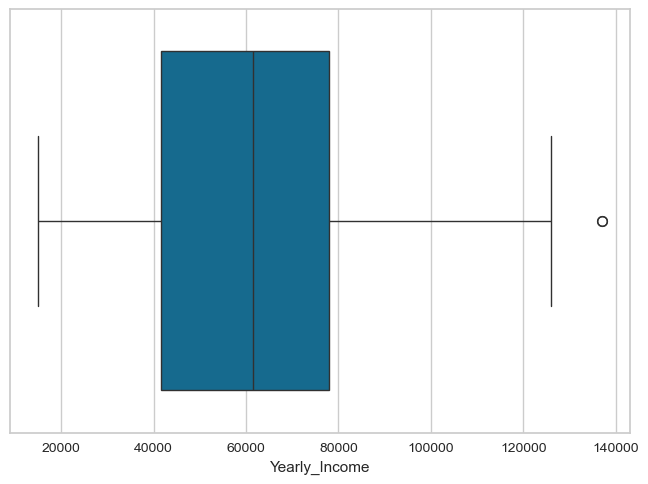

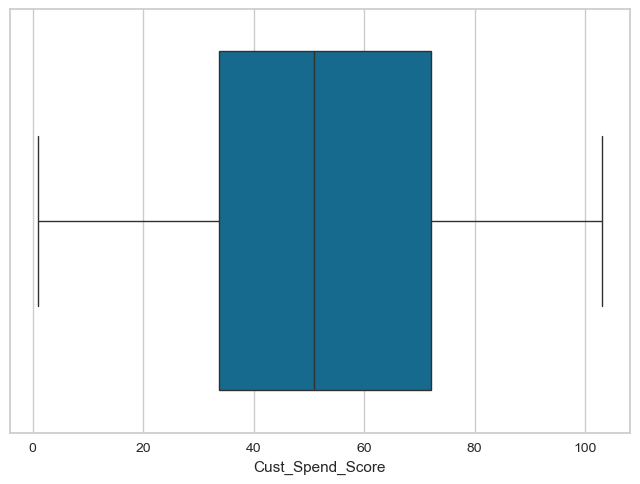

In [15]:
# lets check for missing values
for i in df:
    sns.boxplot(data=df,x=i)
    plt.show()

In [16]:
# since there are no extreme outliers so lets keep them.

In [17]:
scaler=StandardScaler()

In [18]:
df_s=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [19]:
df_s.head(2)

,Yearly_Income,Cust_Spend_Score
0,-1.738999,-0.284181
1,-1.738999,1.063563


<Axes: xlabel='Yearly_Income', ylabel='Cust_Spend_Score'>

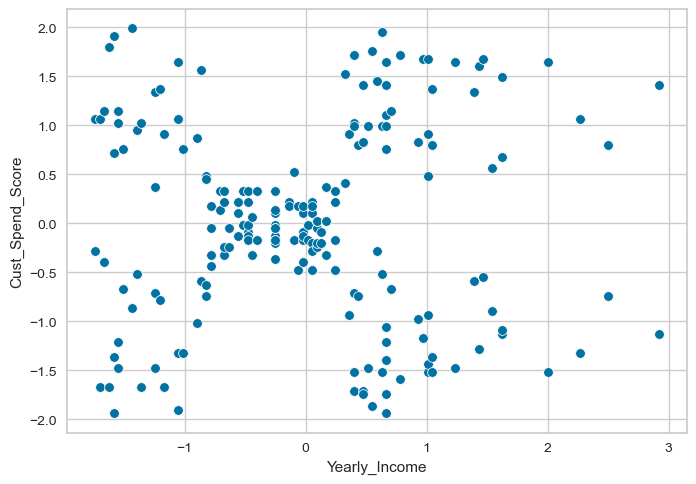

In [20]:
# Visualize the two columns

sns.scatterplot(data=df_s,x='Yearly_Income',y='Cust_Spend_Score')

## K-Mean Custering

In [21]:
# step-1 : Define the value of K
# K-Elbow Plot
# Silhoutte visualization

In [22]:
# 1. K-elbow plot  

In [23]:
wcss=[]
n_clus=range(2,9)
for i in n_clus:
    model=KMeans(n_clusters=i,random_state=2)
    model.fit(df_s)
    wcss.append(model.inertia_)

In [24]:
wcss

[271.37768549176894,
 195.94950219206336,
 110.4396350316663,
 66.69647392440947,
 56.01623226605581,
 45.97374885010318,
 41.83987541822834]

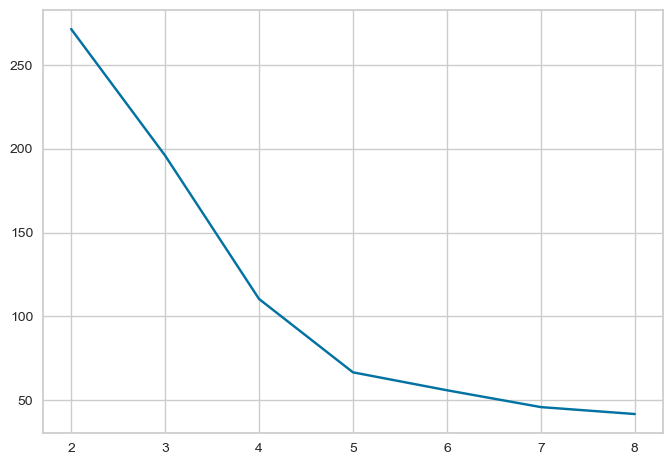

In [25]:
plt.plot(n_clus,wcss)

<function matplotlib.pyplot.show(close=None, block=None)>

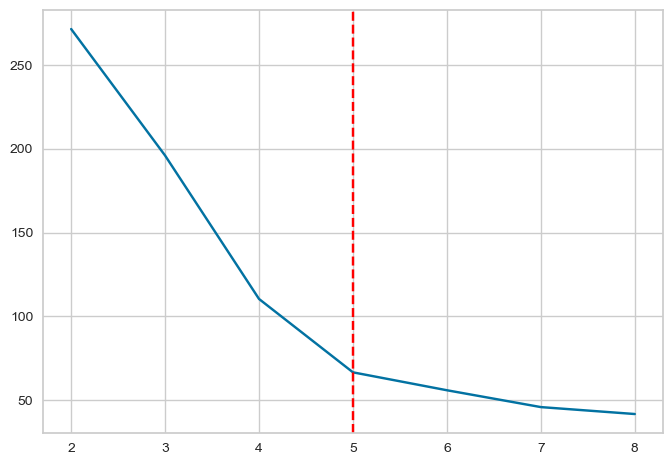

In [26]:
plt.plot(n_clus,wcss)
plt.axvline(x=5,color='red',ls='--')
plt.show

In [27]:
kelbow=KElbowVisualizer(estimator=KMeans(random_state=2),k=8)

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(random_state=2), k=8)

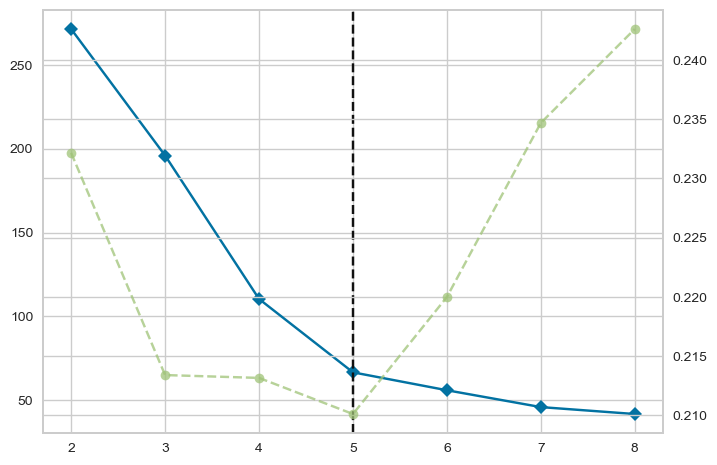

In [28]:
kelbow.fit(df_s)

In [29]:
# kelbow.show()

In [30]:
# Silhouette Visualizer

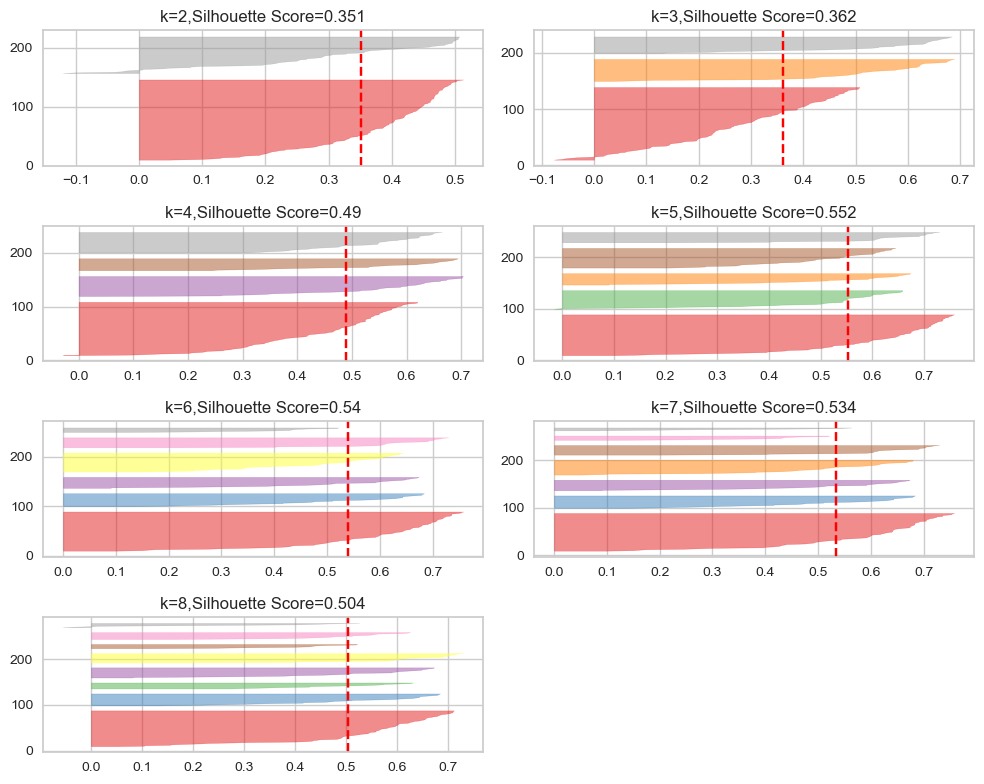

In [31]:
t=1
plt.figure(figsize=(10,8))
for i in n_clus:
    plt.subplot(4,2,t)
    model=KMeans(n_clusters=i,random_state=2)
    sil_viz=SilhouetteVisualizer(model)
    sil_viz.fit(df_s)
    plt.title(f'k={i},Silhouette Score={round(sil_viz.silhouette_score_,3)}')
    t+=1
plt.tight_layout()
plt.show()

In [32]:
## Will go with K=5

## KMeans Clustering

In [35]:
model=KMeans(n_clusters=5,random_state=2)
model.fit(df_s)

KMeans(n_clusters=5, random_state=2)

In [41]:
centroid=model.cluster_centers_
centroid

array([[-0.22414997, -0.00693126],
       [ 1.02054738, -1.24685589],
       [-1.30751869, -1.12631231],
       [ 0.99158305,  1.23437568],
       [-1.35366972,  1.16441429]])

In [44]:
label_kmeans=model.predict(df_s)
label_kmeans

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [46]:
pd.Series(label_kmeans).value_counts().sort_index()

0    80
1    37
2    23
3    39
4    21
Name: count, dtype: int64

In [49]:
# for showing the centroid as well

centroid

array([[-0.22414997, -0.00693126],
       [ 1.02054738, -1.24685589],
       [-1.30751869, -1.12631231],
       [ 0.99158305,  1.23437568],
       [-1.35366972,  1.16441429]])

In [50]:
centroid[0][0]  # extracting first centroid by indexing

-0.22414997281123333

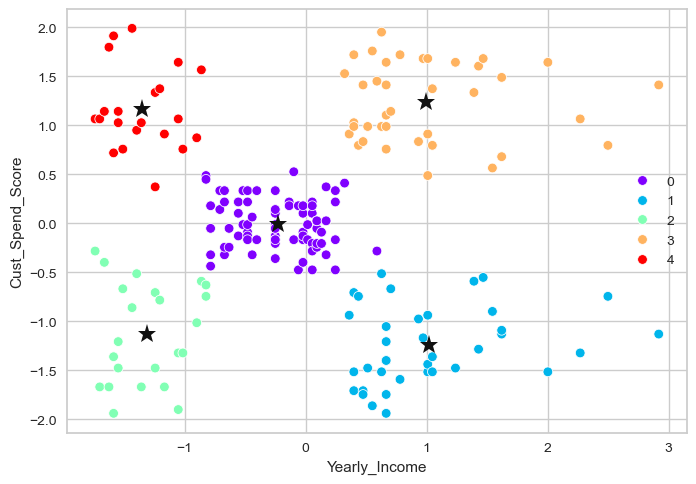

In [51]:
## Visualize these clusters
sns.scatterplot(data=df_s,x='Yearly_Income',y='Cust_Spend_Score',hue=label_kmeans,palette='rainbow')
for i in range(5):
    plt.plot(centroid[i][0],centroid[i][1],marker='*',ms=14,color='k')
plt.show()

## Business Interpretation

In [52]:
data

,Yearly_Income,Age,Cust_Spend_Score,Sex
Cust_Number,,,,
CUSTID1,15000,18,44,0
CUSTID2,15000,18,79,0
CUSTID3,16000,23,8,1
CUSTID4,16000,25,79,1
CUSTID5,17000,32,41,1
...,...,...,...,...
CUSTID196,120000,36,79,1
CUSTID197,126000,46,32,1
CUSTID198,126000,29,72,0


In [54]:
data['Kmeans_Label']=label_kmeans  ## adding labels to original data

In [55]:
data

,Yearly_Income,Age,Cust_Spend_Score,Sex,Kmeans_Label
Cust_Number,,,,,
CUSTID1,15000,18,44,0,2
CUSTID2,15000,18,79,0,4
CUSTID3,16000,23,8,1,2
CUSTID4,16000,25,79,1,4
CUSTID5,17000,32,41,1,2
...,...,...,...,...,...
CUSTID196,120000,36,79,1,3
CUSTID197,126000,46,32,1,1
CUSTID198,126000,29,72,0,3


In [59]:
data.groupby(by='Kmeans_Label').mean().T

Kmeans_Label,0,1,2,3,4
Yearly_Income,54687.5000,87297.297297,26304.347826,86538.461538,25095.238095
Age,43.3875,40.567568,45.695652,32.589744,25.000000
Cust_Spend_Score,51.2000,19.000000,22.130435,83.435897,81.619048
Sex,0.6000,0.459459,0.608696,0.538462,0.571429


In [61]:
# Potentital Group of customers  (ie- high income and low spending people)

data[data['Kmeans_Label']==1]

,Yearly_Income,Age,Cust_Spend_Score,Sex,Kmeans_Label
Cust_Number,,,,,
CUSTID125,70000,21,27,1,1
CUSTID127,71000,40,33,0,1
CUSTID129,71000,59,12,0,1
CUSTID131,71000,46,7,0,1
CUSTID133,72000,28,32,1,1
CUSTID135,73000,23,7,0,1
CUSTID137,73000,43,6,1,1
CUSTID139,74000,22,13,0,1
CUSTID141,75000,54,3,1,1
